### LSTM Prediction

Prediction of the future steps using a LSTM model.

In [1]:
from pandas import Series, DatetimeIndex
from torch.utils.data import DataLoader
from timeatlas import TimeSeriesDataset, TimeSeries
from timeatlas.models.lstm import LSTMPrediction
from timeatlas.models.NN import TimeSeriesPredictionDataset

import torch.nn as nn
import torch


import numpy as np
import datetime

Importing plotly failed. Interactive plots will not work.


Creating some data to show the concept of LSTM prediction in timeatlas

In [2]:
index = DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'])
my_series = Series([0.4, 1.0, 0.7, 0.6], index=index)
ts = TimeSeries(my_series)
tsd = TimeSeriesDataset(data=[ts, ts, ts, ts, ts, ts])

Creating the dataset and the dataloader

In [3]:
dataset = TimeSeriesPredictionDataset(timeseriesdataset=tsd, n=3)

In [4]:
dataloader = DataLoader(dataset, batch_size=2)

Creating an instance for the LSTM. Here we make the big difference between the
workflow of classification, prediction etc.


In [5]:
model = LSTMPrediction(n_features=1,
                       n_hidden=10,
                       seq_len=3,
                       n_layers=10,
                       dropout=0.1,
                       horizon=1,
                       optimizer=torch.optim.Adam,
                       loss_function=nn.MSELoss(),
                       lr=0.001).double()


In [6]:
model.fit(dataloader, epochs=2)

epoch:   1 loss: 0.29379809


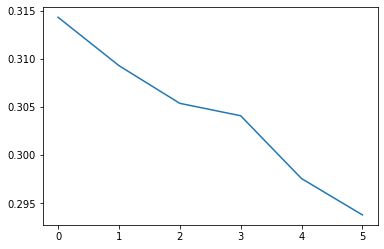

In [8]:
import matplotlib.pyplot as plt
plt.plot(model.loss)

Create the test_set and dataloader. Make a prediction.

In [9]:
test_set = DataLoader(dataset, batch_size=1)
model.predict(horizon=1, testset=test_set)

[tensor([[0.0703]], dtype=torch.float64, grad_fn=<AddmmBackward>),
 tensor([[0.0761]], dtype=torch.float64, grad_fn=<AddmmBackward>),
 tensor([[0.0796]], dtype=torch.float64, grad_fn=<AddmmBackward>),
 tensor([[0.0818]], dtype=torch.float64, grad_fn=<AddmmBackward>),
 tensor([[0.0830]], dtype=torch.float64, grad_fn=<AddmmBackward>),
 tensor([[0.0838]], dtype=torch.float64, grad_fn=<AddmmBackward>)]